import package yang dipakai seperti numpy, pandas, dan matplotlib untuk plotting ghrafik

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

kita masukkan datanya

In [17]:
data = {
    'Bulan dan Tahun': ['Januari 2020', 'Februari 2020', 'Maret 2020', 'April 2020', 'Mei 2020', 'Juni 2020', 'Juli 2020' , 'Agustus 2020', 'September 2020', 'Oktober 2020', 'November 2020', 'Desember 2020' ],
    'harga': [13569, 13581, 13589, 13589, 13599, 13605, 13654, 13654, 13654, 13654, 13654, 13654],
    'X': [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12],
    'Y': [13569, 13581, 13589, 13589, 13599, 13605, 13654, 13654, 13654, 13654, 13654, 13654],
    'XY': [13569, 27162, 40767, 54356, 67995, 81630, 95578, 109232, 122886, 136540, 150194, 163848],
    'XX': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144]
}


Konversi data yang kita beri tadi menjadi dataframe

In [18]:
df = pd.DataFrame(data)

buat kolom sesuai denngan data sama totalnya

In [19]:
total_row = pd.DataFrame({
    'Bulan dan Tahun': ['Total'],
    'harga': [df['harga'].sum()],
    'X': [df['X'].sum()],
    'Y': [df['Y'].sum()],
    'XY': [df['XY'].sum()],
    'XX': [df['XX'].sum()]
})

buat baris baru di bawah untuk total dari tiap kolom

In [20]:
df = pd.concat([df, total_row], ignore_index=True)


fungsi hitung summary tiap variabel

In [21]:
N = len(df) - 1  # Jumlah data (Total tidak dihitung)
total_X = df.loc[df['Bulan dan Tahun'] != 'Total', 'X'].sum() 
total_Y = df.loc[df['Bulan dan Tahun'] != 'Total', 'Y'].sum()  
total_XX = df.loc[df['Bulan dan Tahun'] != 'Total', 'XX'].sum() 
total_XY = df.loc[df['Bulan dan Tahun'] != 'Total', 'XY'].sum()  

rumus dari koefisien regresi yaitu b

In [22]:
b = (N * total_XY - total_X * total_Y) / (N * total_XX - total_X**2)

rumus dari intercept yaitu a

In [23]:
a = (total_Y - b * total_X) / N

print data frane dengan data datanya dan total

In [24]:
print("Tabel Perhitungan Nilai tiap variabel:\n")
print(df)

Tabel Perhitungan Nilai tiap variabel:

   Bulan dan Tahun   harga   X       Y       XY   XX
0     Januari 2020   13569   1   13569    13569    1
1    Februari 2020   13581   2   13581    27162    4
2       Maret 2020   13589   3   13589    40767    9
3       April 2020   13589   4   13589    54356   16
4         Mei 2020   13599   5   13599    67995   25
5        Juni 2020   13605   6   13605    81630   36
6        Juli 2020   13654   7   13654    95578   49
7     Agustus 2020   13654   8   13654   109232   64
8   September 2020   13654   9   13654   122886   81
9     Oktober 2020   13654  10   13654   136540  100
10   November 2020   13654  11   13654   150194  121
11   Desember 2020   13654  12   13654   163848  144
12           Total  163456  78  163456  1063757  650


print hasil hitung koefisien regresi sama interceptnmya

In [25]:
print("\nRumus dari koefisien regresi dan rumus dari intercept\nb = (N * total xy - total x * total y )/ (N * Total XX - Total x kuadrat ")
print("a = (total y - b * total x) / N ")
print("\nnilai A:", a)
print("nilai B:", b)

print("\nRumus persamaan regresi yang didapat adalah:")
print ("Y = a + bX")
print(f"Y = ({a:.2f}) + ({b:.2f})X")



Rumus dari koefisien regresi dan rumus dari intercept
b = (N * total xy - total x * total y )/ (N * Total XX - Total x kuadrat 
a = (total y - b * total x) / N 

nilai A: 13562.560606060606
nilai B: 9.041958041958042

Rumus persamaan regresi yang didapat adalah:
Y = a + bX
Y = (13562.56) + (9.04)X


fungsi persamaan regresi

In [26]:
def equation_y(x):
    return a + b * x

proses datanya dengan kita invoke fungsi equation_y atau persamaan regresi untuk tiap data yang kita punya

In [27]:
X = np.array([1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12]).reshape(-1, 1)
Y = np.array([13569, 13581, 13589, 13589, 13599, 13605, 13654, 13654, 13654, 13654, 13654, 13654])

predicted_Y = equation_y(X)

plot hasil dari grafik regresinya

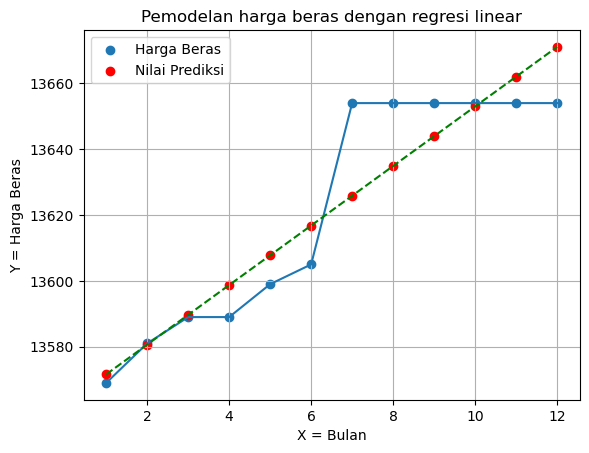

In [28]:
#plot Harga aktualnya
plt.plot(X, Y)
plt.scatter(X, Y, label='Harga Beras')

# Plot Nilai Prediksinya
plt.plot(X, predicted_Y, color='green', ls='--')
plt.scatter(X, predicted_Y, label='Nilai Prediksi', color='red')

"""for i, txt in enumerate(predicted_Y):
    plt.text(X[i], predicted_Y[i], txt, ha='right')"""

# Kasi Label sama legendnya
plt.xlabel('X = Bulan')
plt.ylabel('Y = Harga Beras')
plt.title('Pemodelan harga beras dengan regresi linear')
plt.legend()

# Tampilin plotnya + gridnya
plt.grid()
plt.show()

prediksi untuk tahun 2021 hingga 2022

kita invoke 

In [29]:
X = np.array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]).reshape(-1, 1)

def equation_y(x):
    return a + b * x

predicted_Y = equation_y(X)


kita plot nilainya

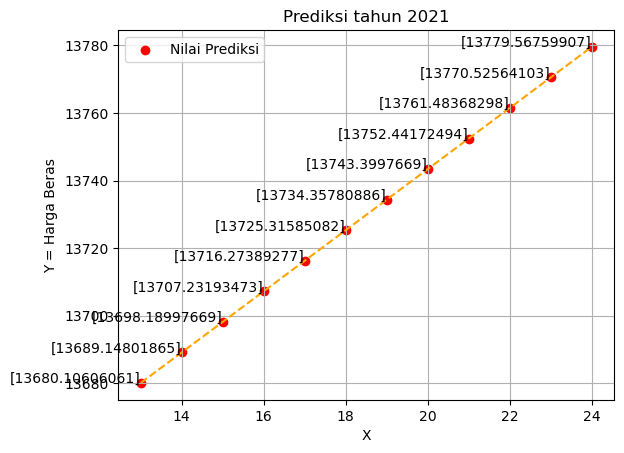

In [30]:
predicted_Y = equation_y(X)

# Plot Nilai Prediksinya
plt.scatter(X, predicted_Y, label='Nilai Prediksi', color='red')
plt.plot(X, predicted_Y, color='orange', ls='--')

for i, txt in enumerate(predicted_Y):
    plt.text(X[i], predicted_Y[i], txt, ha='right')
    
# Kasi Label sama legendnya
plt.xlabel('X')
plt.ylabel('Y = Harga Beras')
plt.title('Prediksi tahun 2021')
plt.legend()

# Tampilin plotnya + gridnya
plt.grid()
plt.show()

prediksi tahun 2022

dengan koefisien regresi dan intercept yang kita punya, kita hanya perlu memasukan jjumlah bulan ke berapa untuk melakukan prediksinya dengan kita invoke dibawah

In [31]:
#prediksi tahun 2022

X = np.array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]).reshape(-1, 1)

def equation_y(x):
    return a + b * x
    
predicted_Y = equation_y(X)


kita plot hasil prediksinya

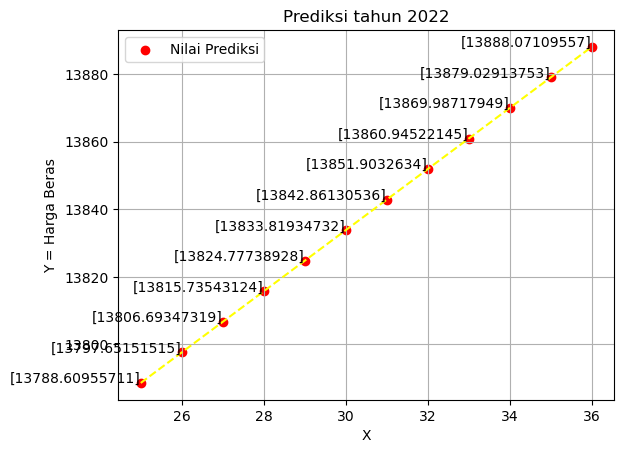

In [32]:
# Plot Nilai Prediksinya
plt.scatter(X, predicted_Y, label='Nilai Prediksi', color='red')
plt.plot(X, predicted_Y, color='yellow', ls='--')

for i, txt in enumerate(predicted_Y):
    plt.text(X[i], predicted_Y[i], txt, ha='right')
    
# Kasi Label sama legendnya
plt.xlabel('X')
plt.ylabel('Y = Harga Beras')
plt.title('Prediksi tahun 2022')
plt.legend()

# Tampilin plotnya + gridnya
plt.grid()
plt.show()

kita cari rmse
dimana mse merupakan rataan selisih kuadrat antara nilai yang diprediksikan dengan diamati, RMSE merupakan akar dari MSE

In [33]:
data = {
    'Bulan dan Tahun': ['Januari 2020', 'Februari 2020', 'Maret 2020', 'April 2020', 'Mei 2020', 'Juni 2020', 'Juli 2020', 'Agustus 2020', 'September 2020', 'Oktober 2020', 'November 2020', 'Desember 2020'],
    'harga': [13569, 13581, 13589, 13589, 13599, 13605, 13654, 13654, 13654, 13654, 13654, 13654],
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Y': [13569, 13581, 13589, 13589, 13599, 13605, 13654, 13654, 13654, 13654, 13654, 13654],
    'prediksi': [13571.60256, 13580.64452, 13589.68648, 13598.72844, 13607.7704, 13616.81235, 13625.85431, 13634.89627, 13643.93823, 13652.98019, 13662.02214, 13671.0641],
    'deviasi': [2.602564, -0.35548, 0.68648, 9.728438, 8.770396, 11.81235, -28.1457, -19.1037, -10.0618, -1.01981, 8.022145, 17.0641],
    'deviasi**2': [6.77334, 0.126365, 0.471255, 94.64251, 76.91985, 139.5317, 792.1797, 364.9525, 101.2392, 1.04002, 64.3548, 291.1836]
}


df = pd.DataFrame(data)

# Menambahkan baris dan kolom sesuai dengan data yang ada
total_row = pd.DataFrame({
    'Bulan dan Tahun': ['Total'],
    'harga': [df['harga'].sum()],
    'X': [df['X'].sum()],
    'Y': [df['Y'].sum()],
    'prediksi': [df['prediksi'].sum()],
    'deviasi': [df['deviasi'].sum()],
    'deviasi**2': [df['deviasi**2'].sum()]
})

# bikin baris totalnya pake panda concat
df = pd.concat([df, total_row], ignore_index=True)

# hitung summary deviasinya
total_d2 = df.loc[df['Bulan dan Tahun'] != 'Total', 'deviasi**2'].sum() 
print(df)

   Bulan dan Tahun   harga   X       Y      prediksi    deviasi   deviasi**2
0     Januari 2020   13569   1   13569   13571.60256   2.602564     6.773340
1    Februari 2020   13581   2   13581   13580.64452  -0.355480     0.126365
2       Maret 2020   13589   3   13589   13589.68648   0.686480     0.471255
3       April 2020   13589   4   13589   13598.72844   9.728438    94.642510
4         Mei 2020   13599   5   13599   13607.77040   8.770396    76.919850
5        Juni 2020   13605   6   13605   13616.81235  11.812350   139.531700
6        Juli 2020   13654   7   13654   13625.85431 -28.145700   792.179700
7     Agustus 2020   13654   8   13654   13634.89627 -19.103700   364.952500
8   September 2020   13654   9   13654   13643.93823 -10.061800   101.239200
9     Oktober 2020   13654  10   13654   13652.98019  -1.019810     1.040020
10   November 2020   13654  11   13654   13662.02214   8.022145    64.354800
11   Desember 2020   13654  12   13654   13671.06410  17.064100   291.183600

fungsi untuk menghitung rmse, mse dan, rmse dari desimal

In [34]:
MSE = (1/N)*total_d2
RMSE = np.sqrt(MSE)
RMSEdecimal = RMSE/100

hasil dari rmse yang kita cari

In [35]:
print("\ntotal deviasi di kuadratkan", total_d2)
print("hasil dari Mean square error", MSE)
print("hasil Root Mean Square Error", RMSE, "%")
print("atau hasil desimalnya", RMSEdecimal)


total deviasi di kuadratkan 1933.4148400000001
hasil dari Mean square error 161.11790333333335
hasil Root Mean Square Error 12.693222732361287 %
atau hasil desimalnya 0.12693222732361287
